In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel
import cartopy as cp
# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRFOUT/Sac_NDown_UCM0/wrfout_d01_2020-06-30_00:00:00")
ncfile1 = Dataset("/data/wto/WRFOUT/Sac_NDown_UCM1/wrfout_d01_2020-06-30_00:00:00")
ncfile2 = Dataset("/data/wto/WRFOUT/Sac_NDown_UCM2/wrfout_d01_2020-06-30_00:00:00")
ncfile3 = Dataset("/data/wto/WRFOUT/Sac_NDown_UCM3/wrfout_d01_2020-06-30_00:00:00")



### Plot of Pressure at the Surface (PSFC)

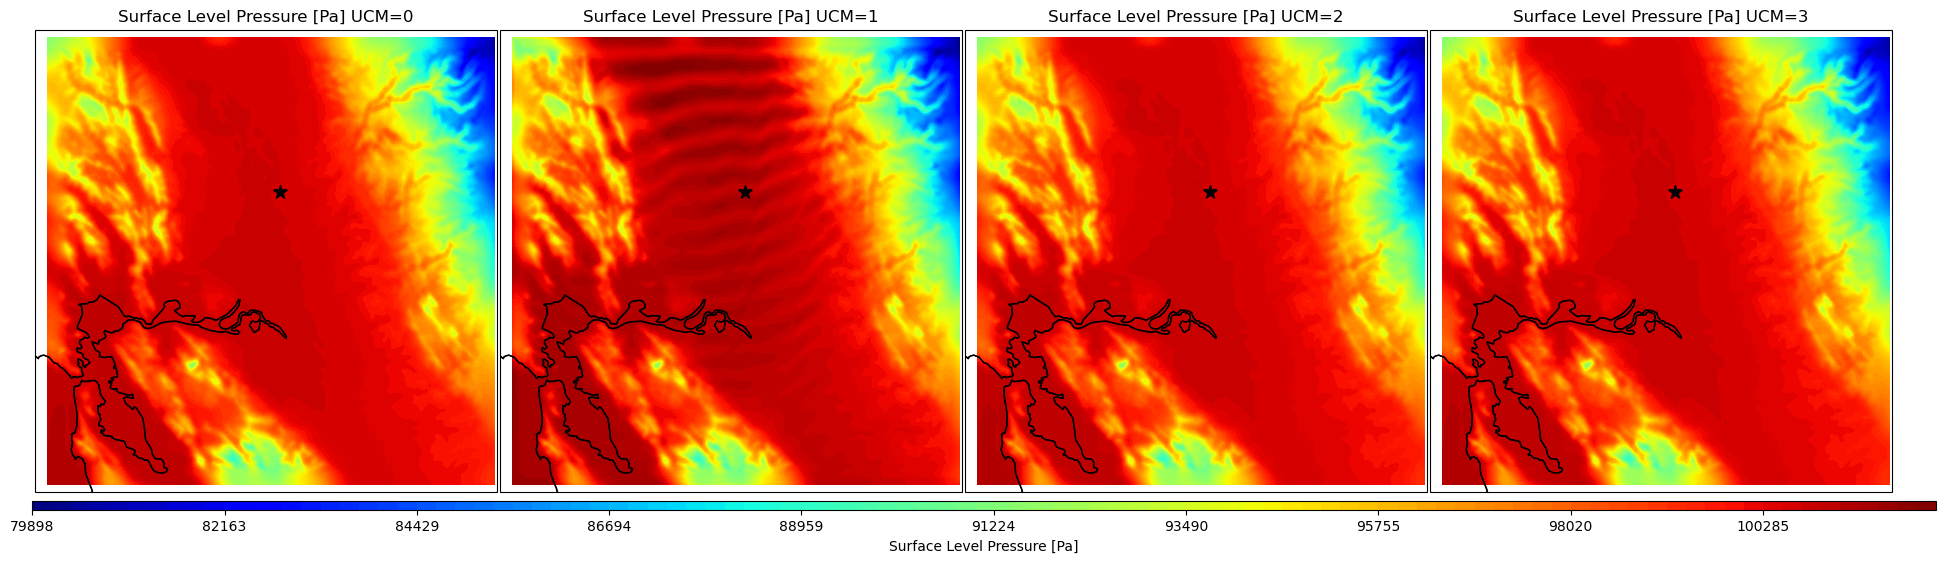

In [28]:
Var0 = getvar(ncfile0, "PSFC")
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
Var3 = getvar(ncfile3, "PSFC")

# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var1).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var1).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title("Surface Level Pressure [Pa] UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title("Surface Level Pressure [Pa] UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=2
ax2.set_title("Surface Level Pressure [Pa] UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title("Surface Level Pressure [Pa] UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

### Surface Pressure Difference between the two models, where UCM = 0 is always the baseline.

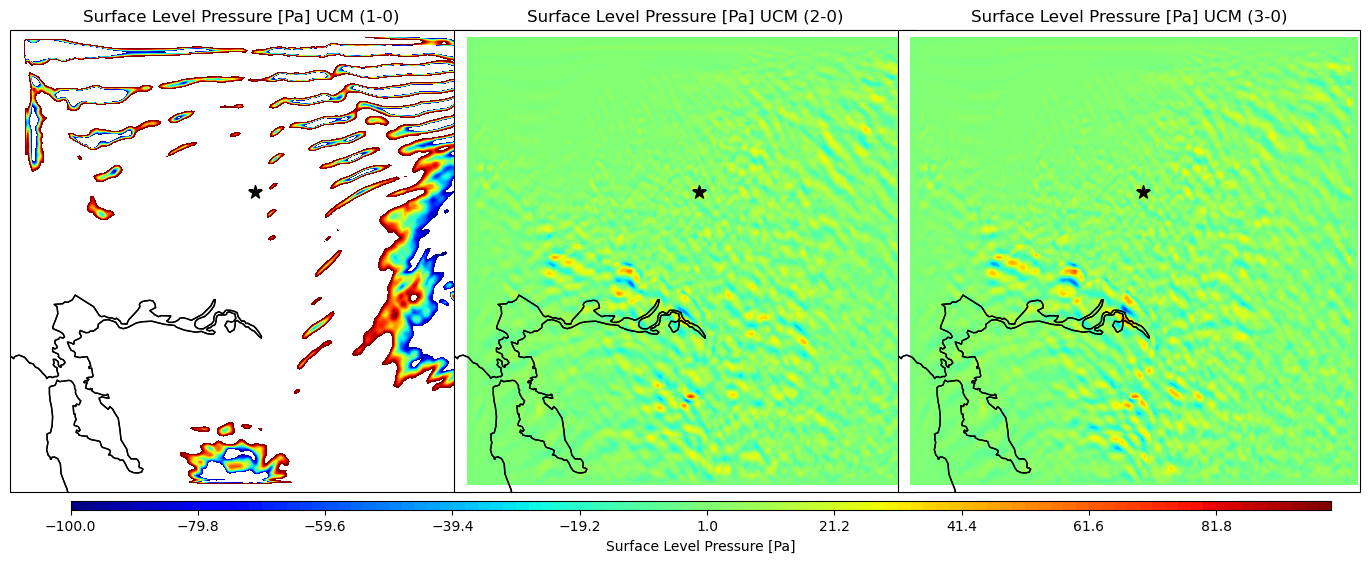

In [32]:
Var0 = getvar(ncfile0, "PSFC")
Var1 = getvar(ncfile1, "PSFC")
Var2 = getvar(ncfile2, "PSFC")
Var3 = getvar(ncfile3, "PSFC")

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.linspace(-100, 100, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title("Surface Level Pressure [Pa] UCM (1-0)")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title("Surface Level Pressure [Pa] UCM (2-0)")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title("Surface Level Pressure [Pa] UCM (3-0)")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Surface Level Pressure [Pa]")

plt.show()

### 2-meter Temperature

### Wind Magnitude

### Ground Heat Flux

### Upward Heat Flux at SFC

## End of Script